In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#Load datasets
D= pd.read_csv('disney_plus_titles.csv')
D.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
95,s96,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
96,s97,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
97,s98,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...
98,s99,TV Show,Star Wars: Visions,NaN,NaN,NaN,"September 22, 2021",2021,TV-PG,1 Season,"Action-Adventure, Animation, Anime",An animated anthology celebrating Star Wars th...


In [3]:
### percentage of null values
round(100*(D.isnull().sum()/len(D.index)),2).sort_values(ascending=False)

director        32.62
country         15.10
cast            13.10
date_added       0.21
rating           0.21
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

* Director column has 32.62% missing values
* Country column has 15.10% missing values
* Cast column has 13.10% missing values

In [4]:
#For missing values in country we will replace with the most common country(mode)
#For cast and director will just add "No data"

D['country'] = D['country'].fillna(D['country'].mode()[0])
D['cast'].replace(np.nan, 'No D',inplace  = True)
D['director'].replace(np.nan, 'No D',inplace  = True)
D.dropna(inplace=True)


In [5]:
#adding a new date column as per date_added
D['date_added'] = pd.to_datetime(D['date_added'])

D['month_added']=D['date_added'].dt.month
D['month_name_added']=D['date_added'].dt.month_name()
D['year_added'] = D['date_added'].dt.year


In [6]:
D.tail(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
1347,s1348,Movie,The Three Caballeros,"Norman Ferguson, Clyde Geronimi, Jack Kinney","Aurora Miranda, Carmen Molina, Sterling Hollow...",United States,2019-11-12,1945,G,72 min,"Animation, Family, Musical",Magical gifts from his friends send Donald on ...,11,November,2019
1348,s1349,Movie,The Three Musketeers,Stephen Herek,"Charlie Sheen, Kiefer Sutherland, Chris O'Donn...","Austria, United Kingdom, United States",2019-11-12,1993,PG,106 min,"Action-Adventure, Comedy, Family",Three loyal swordsmen and an eager recruit uni...,11,November,2019
1349,s1350,Movie,The Tigger Movie,Jun Falkenstein,"Jim Cummings, Nikita Hopkins, Ken Sansom, John...","United States, Japan",2019-11-12,2000,G,81 min,"Action-Adventure, Animation, Kids",Tigger goes looking through the Hundred Acre W...,11,November,2019
1350,s1351,Movie,The Tortoise and the Hare,Wilfred Jackson,No D,United States,2019-11-12,1935,TV-G,9 min,"Animation, Family, Sports","Hare stops to show off, and the slower Tortois...",11,November,2019
1351,s1352,Movie,The Ugly Dachshund,Norman Tokar,"Dean Jones, Suzanne Pleshette, Charlie Ruggles...",United States,2019-11-12,1966,TV-G,93 min,"Animals & Nature, Comedy, Family",The Garrisons live with a Great Dane who think...,11,November,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2021-06-04,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,6,June,2021
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2021-04-02,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,4,April,2021
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2020-12-18,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",12,December,2020
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",2020-09-18,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,9,September,2020


In [20]:
D.to_csv("disney ++.csv")

In [21]:
D.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,11,November,2021
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,11,November,2021
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,11,November,2021
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",11,November,2021
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,11,November,2021


In [7]:
D['year_added'].value_counts()

2019    765
2020    352
2021    327
Name: year_added, dtype: int64

In [1]:
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
sns.countplot(x='year_added', data=D, order=D['year_added'].value_counts().index[:10], facecolor=(0,0,0,0),edgecolor=sns.color_palette("dark"), linewidth=3)
plt.title('Top Years')
plt.savefig('Top Years.png')
plt.show()


NameError: name 'plt' is not defined

# 

* Contents where added most in 2019

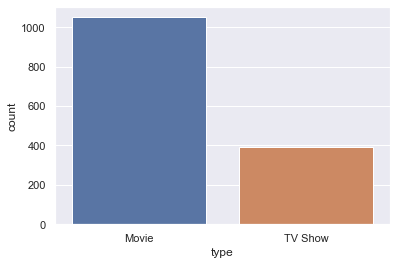

In [9]:
sns.countplot(x='type', data=D)
plt.show()

* The number of Movies is extremely higher than tv shows

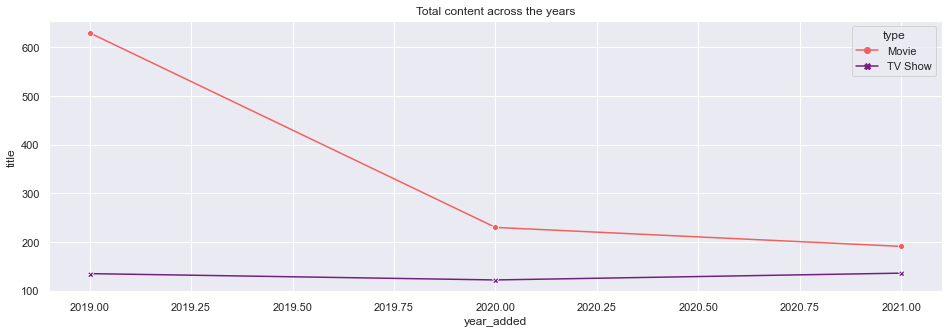

In [10]:
#Checking TV Shows and movies added across the years
type_year = (D.groupby(['type','year_added'])['title'].size()).reset_index()
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = type_year,x = 'year_added',y = 'title',hue = 'type',style = 'type',palette='magma_r',markers=True, dashes=False)
plt.title("Total content across the years")
plt.show()


* Contents were added most in the year 2019 with movies being higher than tv shows.
* Meanwhile the rate at which movies is added reduced each quarter in every year.
* While tv shows content was low in 2019 it began to increase in 2020.

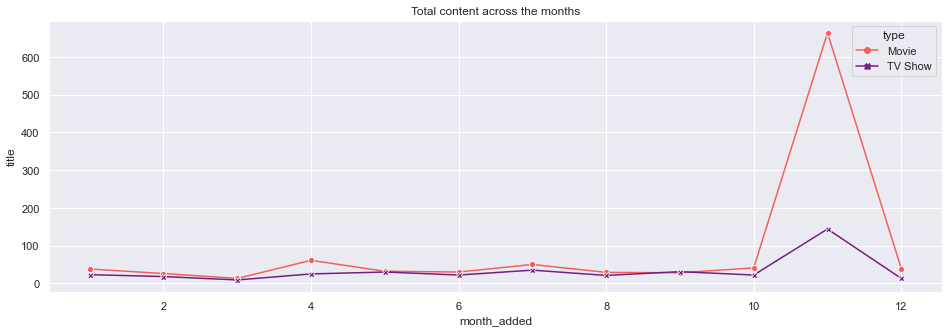

In [11]:
#Checking TV Shows and movies added across the years
type_year = (D.groupby(['type','month_added'])['title'].size()).reset_index()
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = type_year,x = 'month_added',y = 'title',hue = 'type',style = 'type',palette='magma_r',markers=True, dashes=False)
plt.title("Total content across the months")
plt.show()


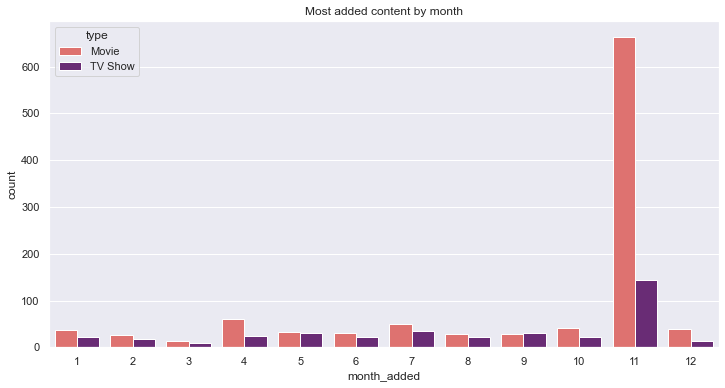

In [12]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data =D ,x= 'month_added',hue = 'type',palette = 'magma_r')
plt.title("Most added content by month")
plt.show()

This tells us that movies are mostly added in the 11th month of the year

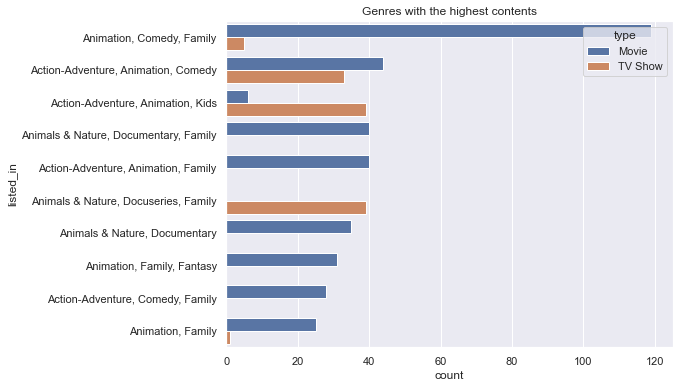

In [13]:
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
sns.countplot(y='listed_in', data=D, hue='type', order=D['listed_in'].value_counts().index[:10])
plt.title('Genres with the highest contents')
plt.savefig('Genres with the highest contents.png')
plt.show()


* The highest number of movies are animations with the comedy and action-adventure genre

In [14]:
D.groupby('director').type.count()

director
Aaron Blaise, Robert Walker    1
Adam Shankman                  3
Adam Stein, Zach Lipovsky      1
Alan Barillaro                 1
Alan Shapiro                   1
                              ..
Zach A. Parrish                1
Zak Knutson                    1
Zhong Yu                       1
Érik Canuel                    1
朱家欣 , 钟智行                      1
Name: type, Length: 610, dtype: int64

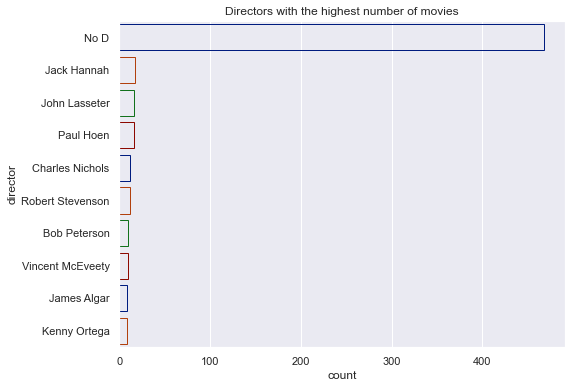

In [15]:
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
sns.countplot(y='director', data=D,order=D['director'].value_counts().index[:10],  facecolor=(0,0,0,0),edgecolor=sns.color_palette("dark",4))
plt.title('Directors with the highest number of movies')
plt.savefig('Directors with the highest number of movies.png')
plt.show()

In [16]:
D.groupby('country').type.count()

country
Argentina                                         2
Argentina, Mexico                                 1
Australia, United Kingdom                         1
Australia, United States                          3
Austria, South Africa                             1
                                                 ..
United States, United Kingdom, Belgium, Canada    1
United States, United Kingdom, Canada             3
United States, United Kingdom, Hungary            1
United States, United Kingdom, South Africa       1
United States, United Kingdom, South Korea        1
Name: type, Length: 89, dtype: int64

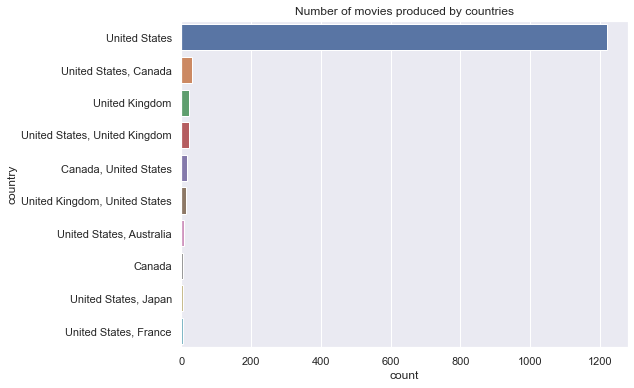

In [17]:
# what country has the mostv movies?

plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
sns.countplot(y='country', data=D, order=D['country'].value_counts().index[:10])
plt.title('Number of movies produced by countries')
plt.savefig('Number of movies produced by countries.png')
plt.show()


* The United States have the most movies

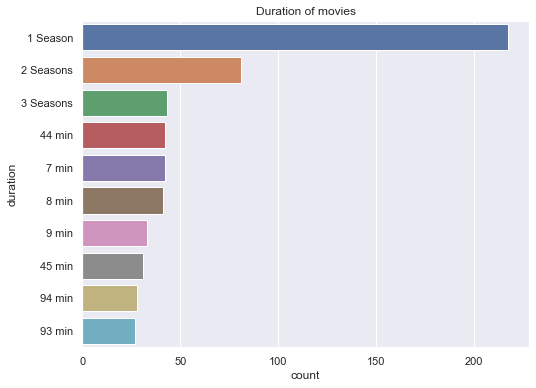

In [18]:
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
sns.countplot(y='duration', data=D, order=D['duration'].value_counts().index[:10])
plt.title('Duration of movies')
plt.savefig('Duration of movies.png')
plt.show()




Most of Netflix contents have 1 season

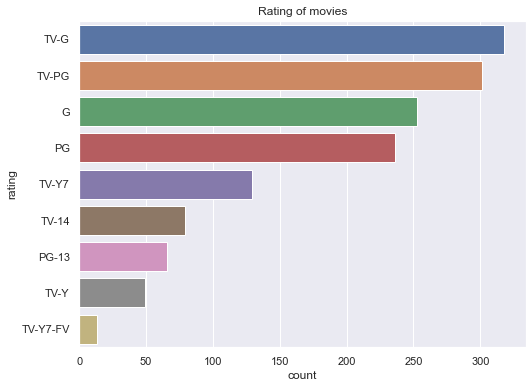

In [19]:
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
sns.countplot(y='rating', data=D, order=D['rating'].value_counts().index[:10])
plt.title('Rating of movies')
plt.savefig('Ratings of movies.png')
plt.show()


The TV-G rating has the highest number of content